<a href="https://colab.research.google.com/github/denniss83/Altin_Kripto_ve_Petrol_Arasindaki_Korelasyon_Analizi_2018_2025/blob/main/Alt%C4%B1n%2C_Kripto_ve_Petrol_Aras%C4%B1ndaki_Korelasyon_Analizi_(2018%E2%80%932025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Altın, Kripto ve Petrol Arasındaki Korelasyon Analizi (2018–2025)

>❗️⚠️ **Uyarı; Bu çalışma, Python programlama dili kullanılarak yalnızca veri analizi becerilerini geliştirmek amacıyla hazırlanmıştır.
Gerçek yatırım tavsiyesi içermez. Hiçbir ticari amaç taşımamaktadır.**

Bu projede; dijital varlıklar (Bitcoin ve Ethereum), geleneksel güvenli liman (Altın) ve enerji piyasasının temsilcisi (Ham Petrol) arasındaki fiyat, getiri ve korelasyon ilişkileri analiz edilmiştir. Amaç, bu 4 varlığın zaman içindeki birlikte hareket etme eğilimlerini ve kriz dönemlerindeki davranışlarını incelemektir.


# 1. Gerekli Kütüphanelerin Yüklenmesi

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

# 2. Veri Toplama (yfinance ile)

In [4]:
start = "2018-01-01"
end = "2025-07-01"

symbols = {
    'BTC': 'BTC-USD',
    'ETH': 'ETH-USD',
    'Gold': 'GLD',
    'Oil': 'CL=F'
}

data = {}
for name, symbol in symbols.items():
    df = yf.download(symbol, start=start, end=end)
    data[name] = df['Close']

df_prices = pd.concat(data.values(), axis=1)
df_prices.columns = data.keys()

df_prices.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BTC,ETH,Gold,Oil
Date,,,,
2018-01-01,13657.200195,772.640991,NaN,NaN
2018-01-02,14982.099609,884.443970,125.150002,60.369999
2018-01-03,15201.000000,962.719971,124.820000,61.630001
2018-01-04,15599.200195,980.921997,125.459999,62.009998
2018-01-05,17429.500000,997.719971,125.330002,61.439999


In [5]:
df_prices.dropna(inplace=True)

In [6]:
print("Veri seti boyutu:", df_prices.shape)

print("\nSütunlar:", df_prices.columns.tolist())

print("\nİlk tarih:", df_prices.index.min())
print("Son tarih:", df_prices.index.max())

print("\nEksik değer sayısı:")
print(df_prices.isnull().sum())

print("\nVeri tipleri:")
print(df_prices.dtypes)


Veri seti boyutu: (1883, 4)

Sütunlar: ['BTC', 'ETH', 'Gold', 'Oil']

İlk tarih: 2018-01-02 00:00:00
Son tarih: 2025-06-30 00:00:00

Eksik değer sayısı:
BTC     0
ETH     0
Gold    0
Oil     0
dtype: int64

Veri tipleri:
BTC     float64
ETH     float64
Gold    float64
Oil     float64
dtype: object


# 3. Fiyatların Görselleştirilmesi

In [7]:
df_norm = df_prices / df_prices.iloc[0] * 100

Normalize Grafik (Hepsi 100$ ile başlasaydı)

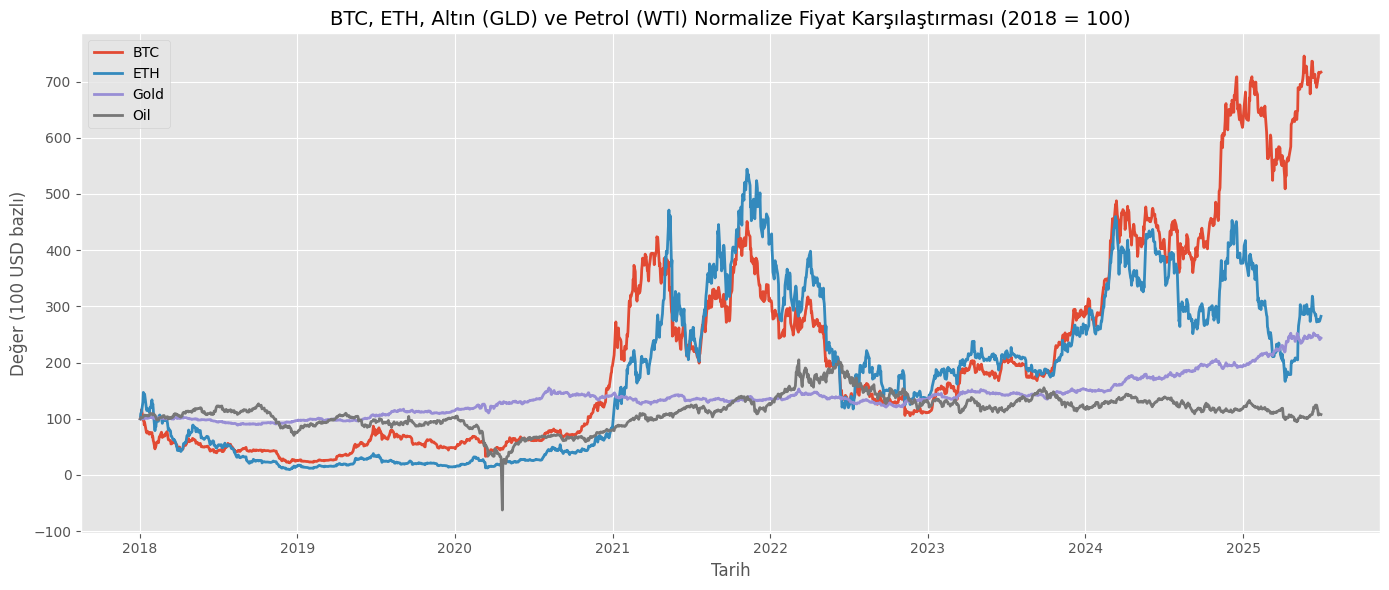

In [8]:
plt.figure(figsize=(14,6))
for col in df_norm.columns:
    plt.plot(df_norm[col], label=col, linewidth=2)

plt.title("BTC, ETH, Altın (GLD) ve Petrol (WTI) Normalize Fiyat Karşılaştırması (2018 = 100)", fontsize=14)
plt.xlabel("Tarih")
plt.ylabel("Değer (100 USD bazlı)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📈 4. Getiri Analizi

## A. Günlük Getirilerin Hesaplanması

In [10]:
returns = df_prices.pct_change()
returns.dropna(inplace=True)
returns.head()

,BTC,ETH,Gold,Oil
Date,,,,
2018-01-03,0.014611,0.088503,-0.002637,0.020871
2018-01-04,0.026196,0.018907,0.005127,0.006166
2018-01-05,0.117333,0.017125,-0.001036,-0.009192
2018-01-08,-0.129631,0.151155,-0.000160,0.004720
2018-01-09,-0.037884,0.131655,-0.004628,0.019925


## B. Kümülatif Getiri (Cumulative Return)

In [11]:
cumulative_returns = (1 + returns).cumprod()

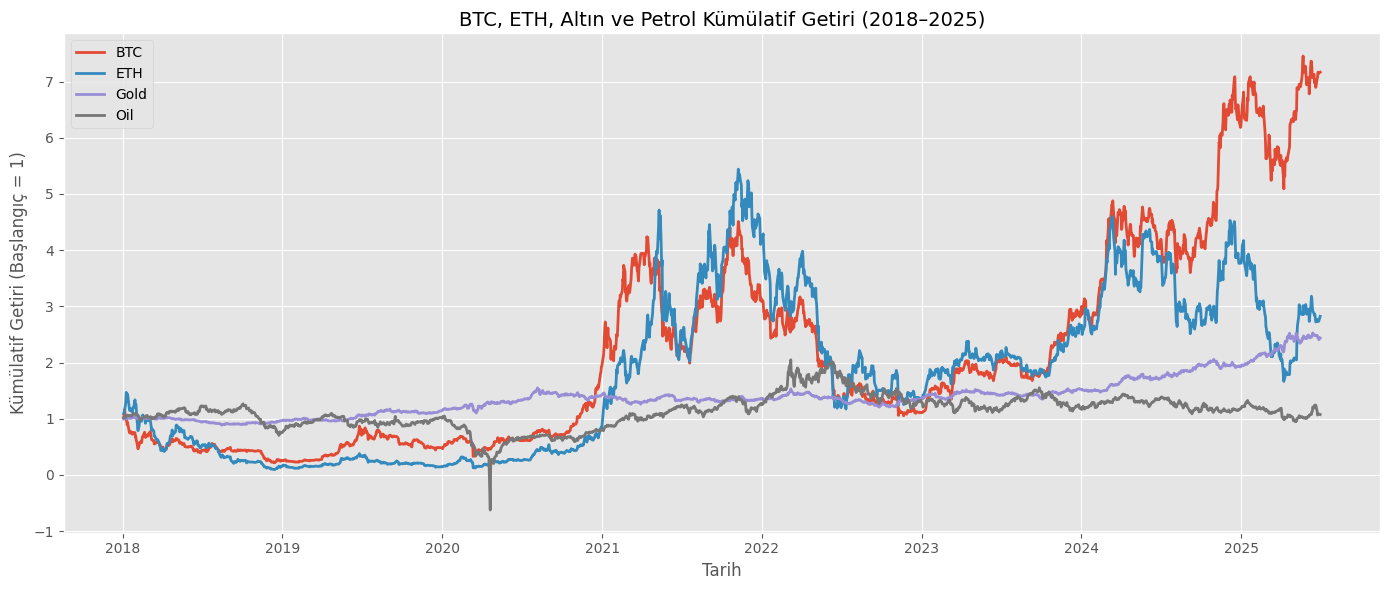

In [12]:
plt.figure(figsize=(14,6))
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns[col], label=col, linewidth=2)

plt.title("BTC, ETH, Altın ve Petrol Kümülatif Getiri (2018–2025)", fontsize=14)
plt.xlabel("Tarih")
plt.ylabel("Kümülatif Getiri (Başlangıç = 1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

>Bu grafik Başlangıç = 1 → %100 yatırım yapıldığında ne kadar değer kazanmış/kaybetmiş olduğunu gösterir..
>
>2.0 = %100 kazanç
>
>0.5 = %50 kayıp

# 🔗 5. Korelasyon Analizi

## A. Korelasyon Matrisi (Isı Haritası / Heatmap)

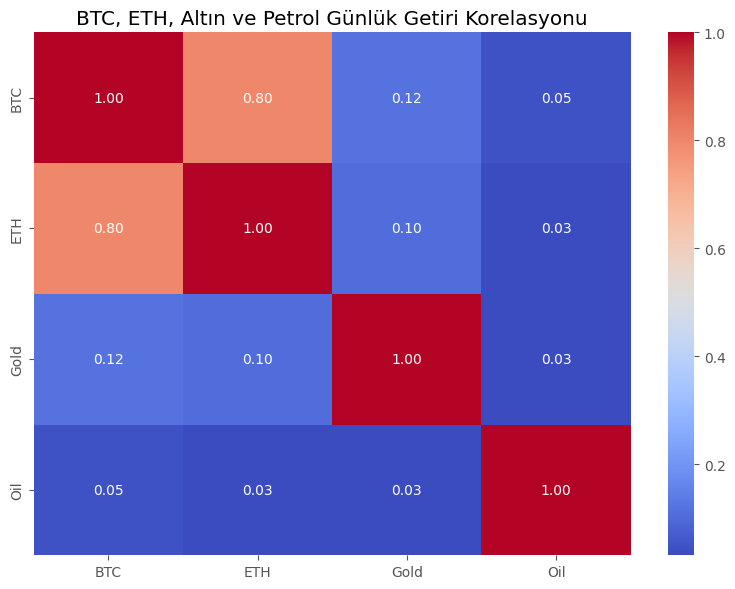

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("BTC, ETH, Altın ve Petrol Günlük Getiri Korelasyonu")
plt.tight_layout()
plt.show()

| Korelasyon Katsayısı | Anlamı                    |
| -------------------- | ------------------------- |
| +1.00                | Tam pozitif ilişki        |
| 0.70–0.99            | Güçlü pozitif ilişki      |
| 0.40–0.69            | Orta düzey pozitif ilişki |
| 0.10–0.39            | Zayıf pozitif ilişki      |
| 0.00                 | İlişkisiz                 |
| -1.00                | Tam negatif ilişki        |


>- BTC ve ETH arasındaki korelasyon oldukça yüksektir (>0.8)  
- BTC ve Altın ile ETH ve Altın arasında zayıf–orta düzey pozitif ilişki görülmektedir  
- Petrol ile kripto varlıklar arasında genellikle zayıf korelasyon bulunmaktadır


## B. Zamanla Değişen Korelasyon (Rolling Correlation)

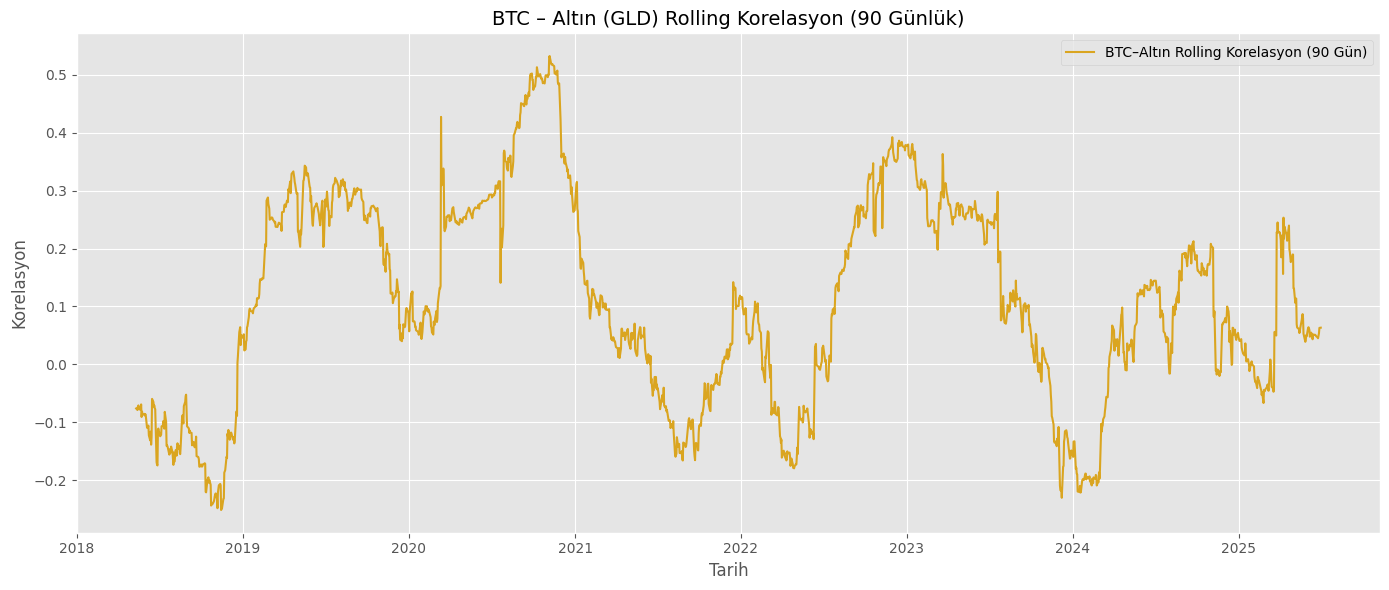

In [14]:
rolling_corr = returns['BTC'].rolling(window=90).corr(returns['Gold'])

plt.figure(figsize=(14,6))
plt.plot(rolling_corr, label='BTC–Altın Rolling Korelasyon (90 Gün)', color='goldenrod')
plt.title("BTC – Altın (GLD) Rolling Korelasyon (90 Günlük)", fontsize=14)
plt.xlabel("Tarih")
plt.ylabel("Korelasyon")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 >Bitcoin ile Altın arasındaki korelasyon zaman içinde dalgalı seyretmiştir.  
Özellikle kriz dönemlerinde korelasyonun yükseldiği gözlenmiştir (örneğin 2020 pandemi dönemi).  
Ancak genel olarak ilişki düşük-orta düzeydedir ve Altın genellikle BTC’ye karşı daha stabil kalmıştır.


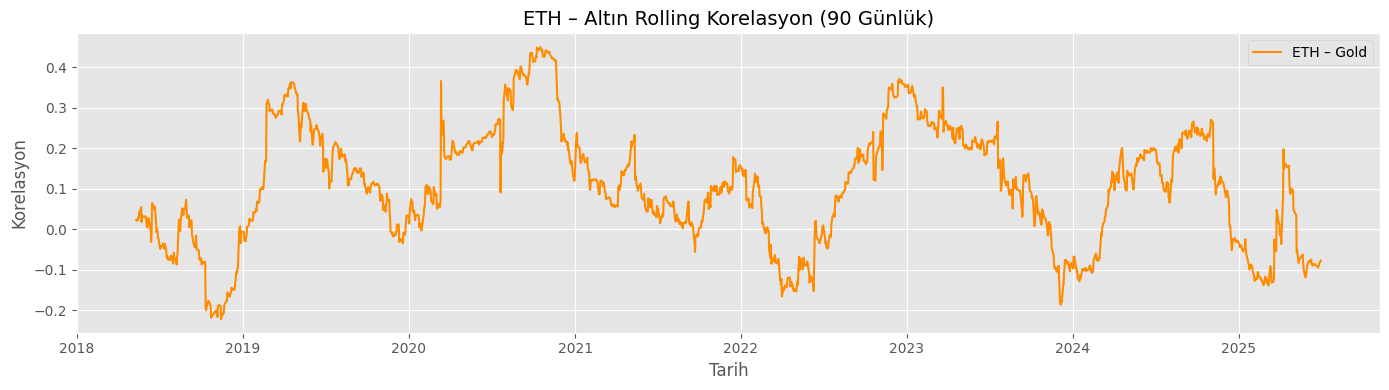

In [15]:
eth_gold_corr = returns['ETH'].rolling(window=90).corr(returns['Gold'])

plt.figure(figsize=(14,4))
plt.plot(eth_gold_corr, label='ETH – Gold', color='darkorange')
plt.title("ETH – Altın Rolling Korelasyon (90 Günlük)", fontsize=14)
plt.xlabel("Tarih")
plt.ylabel("Korelasyon")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

>Ethereum ile Altın arasındaki ilişki, Bitcoin’e kıyasla biraz daha zayıf görünmektedir.  
Bazı dönemlerde negatif korelasyon bile gözlenmiştir. Bu, ETH’nin daha spekülatif doğasından kaynaklanabilir.  
2022 ve 2023 gibi belirsizlik dönemlerinde pozitif korelasyon kısa süreli artmıştır.


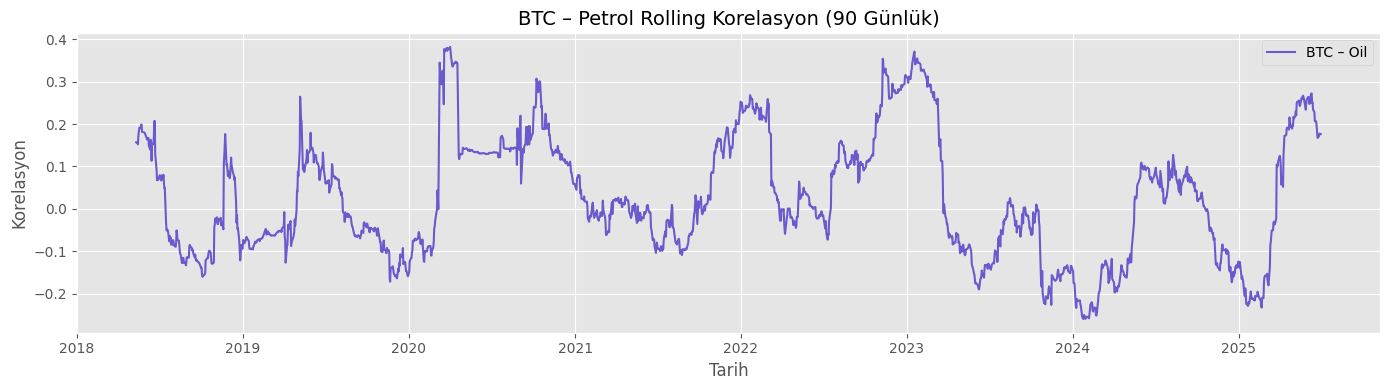

In [16]:
btc_oil_corr = returns['BTC'].rolling(window=90).corr(returns['Oil'])

plt.figure(figsize=(14,4))
plt.plot(btc_oil_corr, label='BTC – Oil', color='slateblue')
plt.title("BTC – Petrol Rolling Korelasyon (90 Günlük)", fontsize=14)
plt.xlabel("Tarih")
plt.ylabel("Korelasyon")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

>Bitcoin ile Petrol arasında belirgin bir korelasyon ilişkisi bulunmamaktadır.  
Korelasyon zaman zaman pozitife yaklaşsa da, genel eğilim zayıf ve dengesizdir.  
Bu durum, BTC'nin enerji fiyatlarından bağımsız hareket ettiğini göstermektedir.


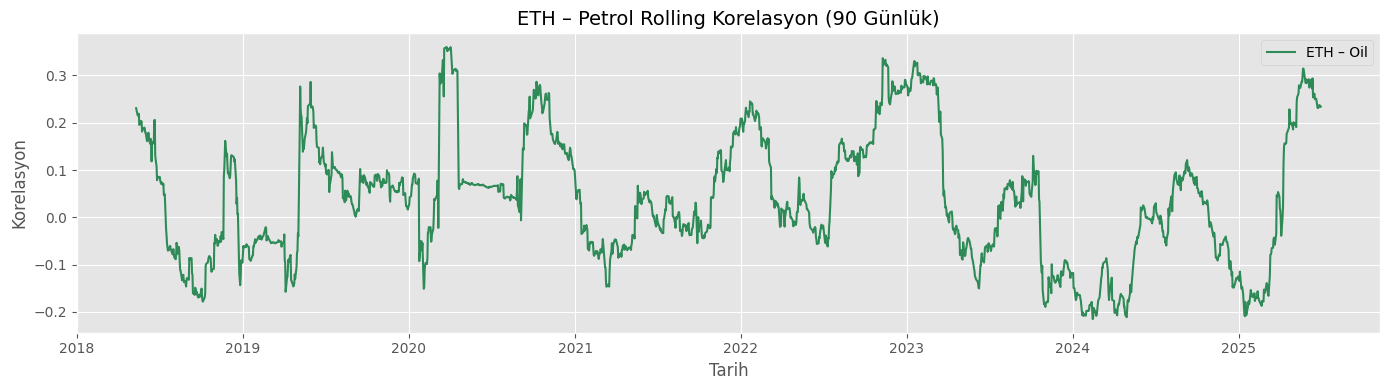

In [17]:
eth_oil_corr = returns['ETH'].rolling(window=90).corr(returns['Oil'])

plt.figure(figsize=(14,4))
plt.plot(eth_oil_corr, label='ETH – Oil', color='seagreen')
plt.title("ETH – Petrol Rolling Korelasyon (90 Günlük)", fontsize=14)
plt.xlabel("Tarih")
plt.ylabel("Korelasyon")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

>Ethereum ile Petrol arasındaki korelasyon oldukça düşüktür.  
Özellikle 2020-2021 döneminde negatif seviyelere kadar gerilemiştir.  
Genel olarak ETH, makroekonomik emtialardan bağımsız bir varlık görünümündedir.

# 🧠 Sonuç ve Bulgular

>❗️⚠️ **Uyarı; Bu çalışma, Python programlama dili kullanılarak yalnızca veri analizi becerilerini geliştirmek amacıyla hazırlanmıştır.
Gerçek yatırım tavsiyesi içermez. Hiçbir ticari amaç taşımamaktadır.**

Bu projede, 2018–2025 yılları arasında Bitcoin (BTC), Ethereum (ETH), Altın (GLD ETF) ve Ham Petrol (WTI) varlıklarının fiyat hareketleri, getirileri ve aralarındaki korelasyon ilişkileri analiz edilmiştir.

Yapılan analizler sonucunda şu bulgular elde edilmiştir:

Performans ve Getiri;

- En yüksek kümülatif getiri genellikle Bitcoin ve zaman zaman Ethereum tarafından sağlanmıştır.

- Altın daha istikrarlı ancak sınırlı getiri sunmuştur.

- Petrol, dönemsel olarak yüksek dalgalanma göstermiştir ve 2020 gibi krizlerde büyük düşüşler yaşamıştır.

Korelasyon Analizi;

- Bitcoin ve Ethereum arasında güçlü pozitif korelasyon vardır (ρ ≈ 0.80+).

- Altın ve kripto paralar arasında zayıf–orta düzey pozitif ilişki gözlenmiştir; kriz dönemlerinde kısa süreli artışlar olmuştur.

- Petrol ile BTC/ETH arasında genel olarak anlamlı bir korelasyon ilişkisi bulunmamaktadır.

Rolling Korelasyon Bulguları;

- Korelasyon zamanla değişmektedir; özellikle küresel ekonomik kriz dönemlerinde korelasyonlar artma eğilimindedir.

- BTC–Altın ilişkisi kriz dönemlerinde geçici olarak güçlenmiştir, ancak uzun vadede zayıf kalmıştır.

- ETH’nin Altın ve Petrol ile olan korelasyonu BTC’ye göre daha düşük ve değişkendir.

Genel Değerlendirme;

Bitcoin ve Ethereum, zamanla geleneksel piyasalardan kısmen bağımsız hareket eden, ancak krizlerde yatırımcı davranışına bağlı olarak korelasyonu artabilen dijital varlıklardır.

Altın hâlâ “geleneksel güvenli liman” olarak istikrarını korurken, kripto paralar daha yüksek risk–getiri profiline sahiptir.

Petrol, özellikle enerji krizi veya jeopolitik olaylardan etkilenen, bağımsız ve yüksek oynaklığa sahip bir emtiadır.

Bu sonuçlar, yatırım portföyü oluştururken dijital ve geleneksel varlıklar arasındaki ilişkiyi anlamak açısından önemli ipuçları sunmaktadır.